```



```
# A/B测试应用实战（python详解）

## 1. 背景
&emsp;&emsp;某电商公司非常注重自己的落地页设计，希望通过改进设计来提高转化率。以往该公司全年转化率平均在13%左右，现在希望设计的新页面能够带来更高的转化率，希望新页面的转化率能有2%的提升，达到15%。在正式推出新页面之前，该公司希望通过AB测试在小范围的用户中进行测试，以确保新页面的效果能够达到预期目标。

## 2. A/B测试基本流程

&emsp;&emsp;了解了基本的背景之后，就可以进入AB测试了。在进行AB测试之前，需要梳理一下AB测试的基本流程，以确保实验的顺利进行。AB测试的基本流程包括以下几个步骤：
- <font size=3 color="orange">**确定实验目标及衡量指标**</font><br>在本案例中实验目标是通过AB测试确定新落地页是否可以提升2%的转化率。衡量指标即为**页面转化率**<br><br>
- <font size=3 color="orange">**设计实验方案**</font><br>设计实验的具体方案，包括实验变量（即页面的具体改动点）、实验时间、实验样本量、划分实验组和对照组等。还需要确定实验数据的收集方法和分析方式。<br>【注】一般分析方式包括描述性统计、假设检验、置信区间估计、回归分析等等。在进行AB测试的时候，需要分析师根据实验的目标和具体情况选择合适的分析方法，并结合实际情况进行解读，提出合理的建议和决策。<br><br>
- <font size=3 color="orange">**执行实验并收集数据**</font><br>按照实验方案进行实验执行，同事记录实验数据。<br><br>
- <font size=3 color="orange">**数据分析和结果评估**</font><br>对实验数据进行分析和评估，包括对实验结果的显著性检验、效果评估等。最后给出结论和建议。<br><br>

## 3. 设计A/B test实验

在A/B测试实验设计这一步，通常需要完成以下6个步骤：
- 1、提出假设
- 2、确定实验分组
- 3、计算实验样本量及试验周期
- 4、上线AB测试并收集数据
- 5、数据分析及假设检验
- 6、得出结论及建议

### **Step1：提出假设**
&emsp;&emsp;设计AB test实验的第一步通常是提出假设。假设是对于某个特定变化我们所期望的结果，也是后续实验的基础，我们需要在后续实验中通过数据验证这个假设是否成立。如果验证成立，我们可以将这个变化推广到全部用户。如果验证不成立，则需要继续优化这个假设或者放弃这个修改方案，以寻找更好的变化。<br>
&emsp;&emsp;在这个实验中，我们希望新页面可以提升2%的转化率，原则上我们应选择单尾检验，准确的说，**应该选择右侧单尾检验，因为我们的假设是新页面的转化率要大于旧页面的转化率**。但是，在本案例中，我们并不能确定新页面的性能一定比当前的页面更好。所以，这里选择双尾检验。

> <font color="grey">【补充说明】</font><br><br>
> <font color="grey">单尾检验和双尾检验是假设检验中的两种常见常见形式。它们的区别在于对假设的方向性不同：
> - <font color="grey">在单尾检验中，研究者针对假设提出了明确的方向性，例如“新设计的落地页转化率比原设计高”、“将按钮颜色从灰色改为红色将导致更多的点击”……因此只检验这个方向是否具有统计显著性，被称为单侧检验。</font>
> - <font color="grey">而在双尾检验中，研究者不确定假设所在的方向，例如“新设计的落地页转化率与原设计是否存在差异”、“改变页面布局会影响用户的满意度”……需要同时检验两个方向的统计显著性，被称为双侧检验。</font><br><br>
> <font color="grey">在AB测试中，一般应根据实验目的、数据分布情况和统计分析方法等因素来确定单尾检验或双尾检验。例如，如果实验的目的是验证新设计的落地页转化率是否明显高于旧设计，就可以选择单尾检验。但如果不确定两种设计是否存在差异，则应选择双尾检验。</font>

简单来说，可以这样辨别单尾/双尾检验：
- <font color="orange">如果备择假设H1中是“≠”，则是双尾检验；</font>
- <font color="orange">如果备择假设H1中是“＞”或者“≥”，则是右侧单尾检验；</font>
- <font color="orange">如果备泽假设H1中是“＜”或者“≤”，则是左侧单尾检验。</font>

此外，需要特别注意的是：**想支持的结论通常放在备择假设上**。所以在本案例中，原假设和备择假设分别是：
- **原假设H0：$P=P0$**
- **备择假设H1：$P≠P0$**<br><br>
其中，$P0$ 代表的是旧版落地页的转化率，$P$ 代表的是新版落地页的转化率。

=============================

### **Step2：确定实验分组**
在此次AB测试中，我们分为实验组和对照组两组：
- 对照组（control组）：这一组用户将看到旧版落地页
- 实验组（treatment组）：这一组用户将看到新版落地页

为了后续计算每一组的转化效率，需要记录每一位参与实验的用户的购买行为，也就是说无论用户看到的是新版落地页还是旧版落地页，都需要记录这位用户最终是否购买了产品。这可以通过在网站上添加相应的追踪代码来实现：
- $0$：代表用户在测试期间没有购买产品
- $1$：代表用户在测试期间购买了产品

这样，后续就可以很容易地计算出每个组的均值，从而得到新旧两版落地页的转化率。

=============================

### **Step3：计算实验样本量、试验周期**

- **实验样本量的确定**

我们之前讲过，根据大数定律和中心极限定理，样本量越大我们的估计就会越精确，但同时也意味着成本越高，所以需要知道实验所需的最小样本量是多少，在成本可控范围里，选择合适的样本量即可。

每一个实验组所需样本量计算公式如下：

$$ N = \frac{\sigma^2}{\delta^2}(Z_{1-\frac{\alpha}{2}}+Z_{1-\beta})^2$$

在这个公式当中，$\alpha$为犯第一类错误的概率，$\beta$为犯第二类错误的概率，σ代表的是样本数据的标准差，δ代表的是预期实验组和对照组两组数据的差值。一般情况下，我们会设置：<br>
- 显著性水平：$\alpha=0.05$，即在拒绝原假设之前，我们有95%的把握新版落地页的转化率比旧版落地页要高
- 统计功效（$1-\beta$）：$\beta=0.2$，即表示测试检测特定效果的能力，如果该特定效果存在的话。在此案例中就是，如果新版落地页真的比旧版转换率要高，该测试有80%的概率能检测出这个状况。

当衡量指标为比率类指标时，标准差计算公式为：

$$ \sigma^2 = P_A(1-P_A)+P_B(1-P_B)$$

其中，$P_A$和$P_B$分别是对照组和实验组的观测值。在此案例中$P_A=13\%$，$P_B=15\%$

每个组所需的最小样本量为：

$$N = \frac{\sigma^2}{\delta^2}(Z_{1-\frac{\alpha}{2}}+Z_{1-\beta})^2 \\
= (0.13*(1-0.13)+0.15*(1-0.15))/(0.15-0.13)^2*(1.96+0.84)^2   \\
= 4716$$

In [5]:
(0.13*(1-0.13)+0.15*(1-0.15))/(0.15-0.13)**2*(1.96+0.84)**2

4715.760000000005

In [2]:
# 使用Python完成最小样本量计算
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import statsmodels.stats.api as sms 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
# import seaborn as sns 

In [3]:
effect_size = sms.proportion_effectsize(0.13, 0.15) # 根据我们的预期比率计算效果量

In [5]:
effect_size

-0.0576728617308947

In [6]:
required_n = sms.NormalIndPower().solve_power( 
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1 ,
    ) # 计算所需的样本量

In [7]:
required_n

4719.4740575998185

In [8]:
np.ceil(required_n) #向上取整

4720.0

- 实验周期的确定

根据上面最小样本量的计算，我们知道此次AB测试至少需要9440个用户参与测试，假如该落地页以往每天的平均浏览量为1000，则实验周期至少需要的天数为：

$$试验周期 = 9440/1000 = 9.4 ≈10（天）$$

### **Step4：上线AB测试并收集数据**

目前市面上大家熟知的大公司基本上都在做AB测试，比如：百度、阿里、腾讯、字节跳动、京东、滴滴、携程、美团等：
- 百度：百度统计可视化A/B测试：https://baijiahao.baidu.com/s?id=1735048932168957887&wfr=spider&for=pc
- 字节跳动：巨量引擎「AB实验工具」:https://zhuanlan.zhihu.com/p/508366232
- 阿里：淘宝推出的 A/B 测试平台，主要针对淘宝商家进行 A/B 测试
- 腾讯：腾讯云AB实验平台：https://abtest.qq.com/

大公司做AB测试的主要特点就是。一般都是自研系统。而对于规模不是那么大的企业，也有做AB测试的需求，比如互金、运动。、在线教育、SaaS的都有做A/B测试，但是这部分企业一般是使用第三方的A/B测试工具。目前市面上的第三方AB测试工具主要有：
- 神测数据：https://www.sensorsdata.cn/features/ABTesting.html
- ABtester：提供web网站A/B测试http://www.abtester.cn/
- 热云数据：支持App、web、H5的A/B测试https://www.appadhoc.com/

### Step5：数据分析及假设检验

这里，我们使用的是Kaggle上的A/B测试数据集来模拟练习。（数据集已经给大家下载至网盘，VX加小可爱:littlecat_1205回复【DA】即可领取）

- **导入数据集**

In [9]:
# 导入数据集
df = pd.read_csv("ab_data.csv")

In [10]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


字段名称含义：
- `user_id`：用户ID
- `timestamp`：用户访问页面的时间
- `group`：用户分组情况（新落地页为treatment组，旧版落地页为control组）
- `landing_page`：每位用户看到的落地页（分为新旧两版落地页）
- `converted`：是否成功转化（1代表成功转化，0代表未转化）

In [12]:
df["group"].value_counts()

group
treatment    147276
control      147202
Name: count, dtype: int64

In [13]:
df["landing_page"].value_counts()

landing_page
old_page    147239
new_page    147239
Name: count, dtype: int64

- **数据清洗**

In [14]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
# 检查缺失值并处理
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [15]:
# 检查重复值并处理
df.duplicated().sum() #对于整体数据集没有重复值

0

In [16]:
# 检查用户是否有重复值
df["user_id"].duplicated().sum()

3894

In [17]:
df[df["user_id"].duplicated()]["user_id"]

2656      698120
2893      773192
7500      899953
8036      790934
10218     633793
           ...  
294308    905197
294309    787083
294328    641570
294331    689637
294355    744456
Name: user_id, Length: 3894, dtype: int64

In [18]:
# 查看其中一位重复用户
df[df["user_id"]==899953]

,user_id,timestamp,group,landing_page,converted
3489,899953,2017-01-05 05:36:02.120641,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0


In [19]:
# 储存所有的重复用户ID
del_id = df[df["user_id"].duplicated()]["user_id"].values

In [20]:
len(del_id)

3894

In [21]:
del_id

array([698120, 773192, 899953, ..., 641570, 689637, 744456])

In [22]:
df["user_id"].isin(del_id).sum()

7788

In [23]:
~df["user_id"].isin(del_id)

0         True
1         True
2         True
3         True
4         True
          ... 
294473    True
294474    True
294475    True
294476    True
294477    True
Name: user_id, Length: 294478, dtype: bool

In [28]:
df_new = df[~df["user_id"].isin(del_id)]
df_new

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [31]:
pd.to_datetime(df_new['timestamp'])

0        2017-01-21 22:11:48.556739
1        2017-01-12 08:01:45.159739
2        2017-01-11 16:55:06.154213
3        2017-01-08 18:28:03.143765
4        2017-01-21 01:52:26.210827
                    ...            
294473   2017-01-03 22:28:38.630509
294474   2017-01-12 00:51:57.078372
294475   2017-01-22 11:45:03.439544
294476   2017-01-15 01:20:28.957438
294477   2017-01-16 12:40:24.467417
Name: timestamp, Length: 286690, dtype: datetime64[ns]

In [32]:
# 处理时间，并检查时间天数
date_days = pd.to_datetime(df_new['timestamp']).dt.strftime('%Y-%m-%d')

In [33]:
date_days

0         2017-01-21
1         2017-01-12
2         2017-01-11
3         2017-01-08
4         2017-01-21
             ...    
294473    2017-01-03
294474    2017-01-12
294475    2017-01-22
294476    2017-01-15
294477    2017-01-16
Name: timestamp, Length: 286690, dtype: object

In [34]:
len(date_days.unique()) #有23天

23

In [35]:
df_new['timestamp'].str.split(" ")

0         [2017-01-21, 22:11:48.556739]
1         [2017-01-12, 08:01:45.159739]
2         [2017-01-11, 16:55:06.154213]
3         [2017-01-08, 18:28:03.143765]
4         [2017-01-21, 01:52:26.210827]
                      ...              
294473    [2017-01-03, 22:28:38.630509]
294474    [2017-01-12, 00:51:57.078372]
294475    [2017-01-22, 11:45:03.439544]
294476    [2017-01-15, 01:20:28.957438]
294477    [2017-01-16, 12:40:24.467417]
Name: timestamp, Length: 286690, dtype: object

In [36]:
[i[0] for i in df_new['timestamp'].str.split(" ")]

['2017-01-21',
 '2017-01-12',
 '2017-01-11',
 '2017-01-08',
 '2017-01-21',
 '2017-01-10',
 '2017-01-19',
 '2017-01-17',
 '2017-01-04',
 '2017-01-15',
 '2017-01-18',
 '2017-01-21',
 '2017-01-09',
 '2017-01-22',
 '2017-01-22',
 '2017-01-22',
 '2017-01-17',
 '2017-01-08',
 '2017-01-24',
 '2017-01-17',
 '2017-01-12',
 '2017-01-09',
 '2017-01-23',
 '2017-01-20',
 '2017-01-23',
 '2017-01-05',
 '2017-01-12',
 '2017-01-24',
 '2017-01-06',
 '2017-01-13',
 '2017-01-05',
 '2017-01-05',
 '2017-01-07',
 '2017-01-11',
 '2017-01-23',
 '2017-01-11',
 '2017-01-19',
 '2017-01-03',
 '2017-01-02',
 '2017-01-16',
 '2017-01-03',
 '2017-01-22',
 '2017-01-08',
 '2017-01-05',
 '2017-01-18',
 '2017-01-22',
 '2017-01-20',
 '2017-01-23',
 '2017-01-12',
 '2017-01-05',
 '2017-01-18',
 '2017-01-22',
 '2017-01-17',
 '2017-01-22',
 '2017-01-20',
 '2017-01-09',
 '2017-01-03',
 '2017-01-10',
 '2017-01-11',
 '2017-01-19',
 '2017-01-23',
 '2017-01-11',
 '2017-01-19',
 '2017-01-24',
 '2017-01-07',
 '2017-01-08',
 '2017-01-

In [37]:
len(set([i[0] for i in df_new['timestamp'].str.split(" ")]))

23

In [38]:
# 确保数据一一匹配
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286690 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       286690 non-null  int64 
 1   timestamp     286690 non-null  object
 2   group         286690 non-null  object
 3   landing_page  286690 non-null  object
 4   converted     286690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.1+ MB


In [39]:
# control组对应old_page,treatment组对应new_page
(((df_new['group']=='treatment')&(df_new['landing_page']=='new_page'))|((df_new['group']=='control')&(df_new['landing_page']=='old_page'))).sum()

286690

In [40]:
# 确保contorl组每个用户看到的是旧页面，treatment组看到的是新页面
pd.crosstab(df_new['group'], df_new['landing_page'])

landing_page,new_page,old_page
group,,
control,0,143293
treatment,143397,0


至此，所有的数据清洗工作已完成。

- **抽样**

根据前面最小样本量的计算，我们至少需要每组4720个样本，这里我们选择每组抽样5000个（实际工作中不需要抽样这一步）

In [42]:
df_new[df_new['group'] == 'control'].sample(n=int(required_n), random_state=22)

,user_id,timestamp,group,landing_page,converted
186628,763854,2017-01-21 03:43:17.188315,control,old_page,0
57904,690555,2017-01-18 06:38:13.079449,control,old_page,0
13276,861520,2017-01-06 21:13:40.044766,control,old_page,0
228415,630778,2017-01-05 16:42:36.995204,control,old_page,0
96065,656634,2017-01-04 15:31:21.676130,control,old_page,0
...,...,...,...,...,...
65843,872601,2017-01-03 19:00:05.954550,control,old_page,0
94034,646677,2017-01-17 15:34:00.011127,control,old_page,0
77635,895315,2017-01-07 02:41:17.321930,control,old_page,0
63216,648194,2017-01-16 22:44:54.889419,control,old_page,0


In [43]:
required_n = 5000
control_sample = df_new[df_new['group'] == 'control'].sample(n=required_n, random_state=22) 
treatment_sample = df_new[df_new['group'] == 'treatment'].sample(n=required_n, random_state=22) 

ab_test = pd.concat([control_sample, treatment_sample], axis=0) 
ab_test.reset_index(drop=True, inplace=True)
ab_test

,user_id,timestamp,group,landing_page,converted
0,763854,2017-01-21 03:43:17.188315,control,old_page,0
1,690555,2017-01-18 06:38:13.079449,control,old_page,0
2,861520,2017-01-06 21:13:40.044766,control,old_page,0
3,630778,2017-01-05 16:42:36.995204,control,old_page,0
4,656634,2017-01-04 15:31:21.676130,control,old_page,0
...,...,...,...,...,...
9995,787786,2017-01-06 18:10:45.577881,treatment,new_page,0
9996,770196,2017-01-24 07:07:24.954319,treatment,new_page,0
9997,775724,2017-01-18 10:54:36.300523,treatment,new_page,0
9998,920254,2017-01-23 00:40:30.728885,treatment,new_page,0


In [44]:
pd.crosstab(ab_test['group'], ab_test['landing_page'])

landing_page,new_page,old_page
group,,
control,0,5000
treatment,5000,0


- **可视化结果【选做】**

In [45]:
ab_test.head()

,user_id,timestamp,group,landing_page,converted
0,763854,2017-01-21 03:43:17.188315,control,old_page,0
1,690555,2017-01-18 06:38:13.079449,control,old_page,0
2,861520,2017-01-06 21:13:40.044766,control,old_page,0
3,630778,2017-01-05 16:42:36.995204,control,old_page,0
4,656634,2017-01-04 15:31:21.676130,control,old_page,0


In [46]:
conversion_rates = ab_test.groupby('group')['converted'].agg([np.mean,np.std])

/var/folders/7h/3q884k7n455b59vfjlyq33vm0000gn/T/ipykernel_35753/3751263133.py:1: FutureWarning: The provided callable <function mean at 0x1066bad40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  conversion_rates = ab_test.groupby('group')['converted'].agg([np.mean,np.std])
/var/folders/7h/3q884k7n455b59vfjlyq33vm0000gn/T/ipykernel_35753/3751263133.py:1: FutureWarning: The provided callable <function std at 0x1066bae80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  conversion_rates = ab_test.groupby('group')['converted'].agg([np.mean,np.std])


In [47]:
conversion_rates

,mean,std
group,,
control,0.1232,0.328700
treatment,0.1266,0.332558


In [48]:
conversion_rates.columns = ['conversion_rate', 'std_deviation']
conversion_rates

,conversion_rate,std_deviation
group,,
control,0.1232,0.328700
treatment,0.1266,0.332558


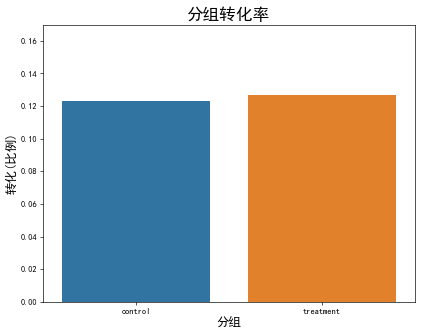

In [59]:
plt.rcParams['font.family'] = 'SimHei'
# plt.rcParams['font.family'] = "Arial Unicode MS"
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,6),dpi=60) 

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False) 

plt.ylim(0, 0.17) 
plt.title( '分组转化率', fontsize=20) 
plt.xlabel('分组', fontsize=15) 
plt.ylabel('转化(比例)', fontsize=15);

从上面的统计数据来看，新旧两版落地页的表现结果非常相近，相比于旧版落地页，新版落地页的转化率略微好一点点，高了0.3%<br><br>
那么，这种差异在统计学上显著么？我们可以直接说，新版落地页更好么？

- **假设检验**

我们分析的最后一步就是假设检验了。那么，具体选择哪一种假设检验呢？在统计学中，当样本容量较大时（一般是大于30），我们可以使用Z检验或者t检验。<br><br>
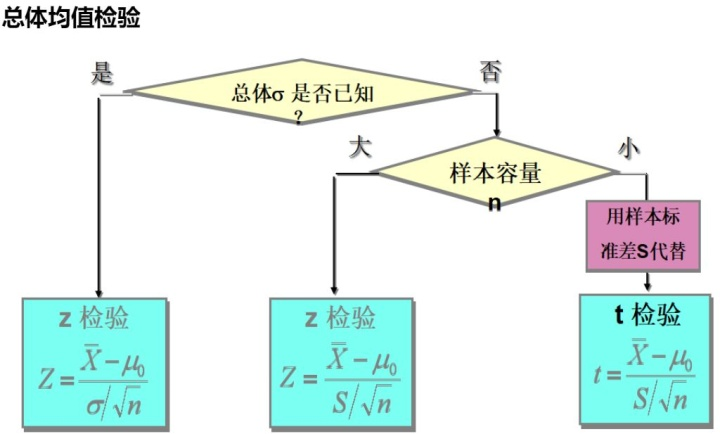

在这个案例中，由于我们的样本非常大，所以我们使用Z检验。Python中的statsmodels.stats.proportion模块可以来计算P值和置信区间：

In [49]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [50]:
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

In [51]:
control_results

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    1
4999    0
Name: converted, Length: 5000, dtype: int64

In [52]:
treatment_results

5000    0
5001    0
5002    0
5003    0
5004    0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: converted, Length: 5000, dtype: int64

In [53]:
control_results.sum()

616

In [54]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

In [55]:
nobs

[5000, 5000]

In [56]:
successes

[616, 633]

In [57]:
z_stat, pval = proportions_ztest(successes, nobs=nobs)

In [58]:
z_stat

-0.5142080369388495

In [59]:
pval

0.6071065493288474

In [60]:
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

In [61]:
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.51
p-value: 0.607
ci 95% for control group: [0.114, 0.132]
ci 95% for treatment group: [0.117, 0.136]


### Step6：分析结果及建议

由于我们计算出来的P值=0.607远高于显著水平$\alpha=0.05$，所以我们不能拒绝原假设H0.这意味着新版落地页与旧版落地页没有明显不同（更不用说更好了……）

此外，我们继续看置信区间，treatment组的置信区间为$[0.117,0.136]$，可以看出：
- 它包括我们的转化率基准线13%
- 它不包括我们的转化率目标值15%

也可以说明，新版落地页的真实转化率更有可能与我们的基线相似，而没有办法达到我们期望的15%。进一步证明了，新版设计并不是一个很好的改进。